<a href="https://colab.research.google.com/github/ANAGHA-SREYAS/Unified_mentor_internship/blob/main/Crop_production_analysis_in_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dataset and Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data=pd.read_csv('/content/Crop Production data.csv')
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Understanding the data set

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [35]:
#descriptive statistics
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [36]:
#checking for null values
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

production column contains 3730 null values

In [37]:
#Handling missing values
data = data.dropna(subset=['Production'])
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [38]:
#adding a new column
data['Yield']=data['Area']/data['Production']
data.head(1)

<ipython-input-38-df6ce6a0de7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Yield']=data['Area']/data['Production']


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,0.627


# Exploratory data analysis

<Axes: xlabel='Season', ylabel='Yield'>

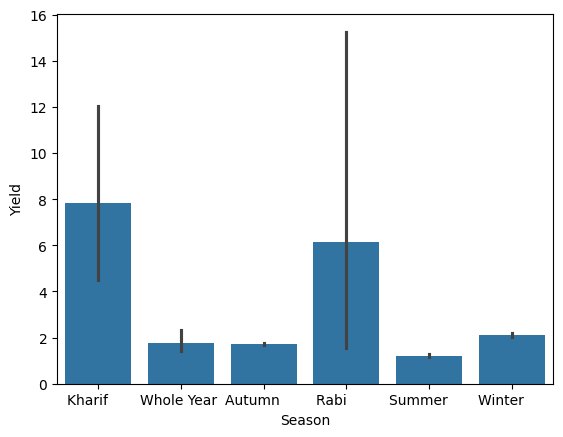

In [39]:
#finding the relation between season and yield
sns.barplot(x='Season',y='Yield',data=data)

In [40]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Yield'],
      dtype='object')

<Axes: xlabel='Crop_Year', ylabel='Yield'>

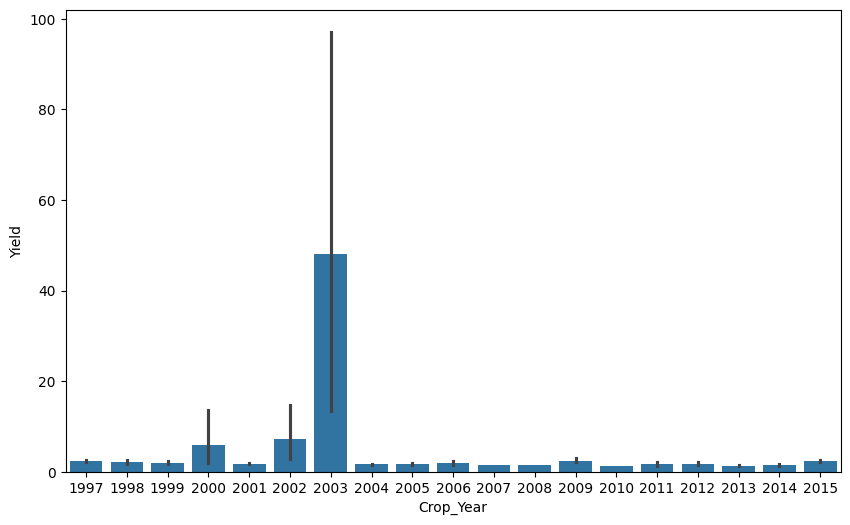

In [41]:
#finding the relation between crop year and yield
plt.figure(figsize=(10,6))
sns.barplot(x='Crop_Year',y='Yield',data=data)

<Axes: xlabel='State_Name', ylabel='Yield'>

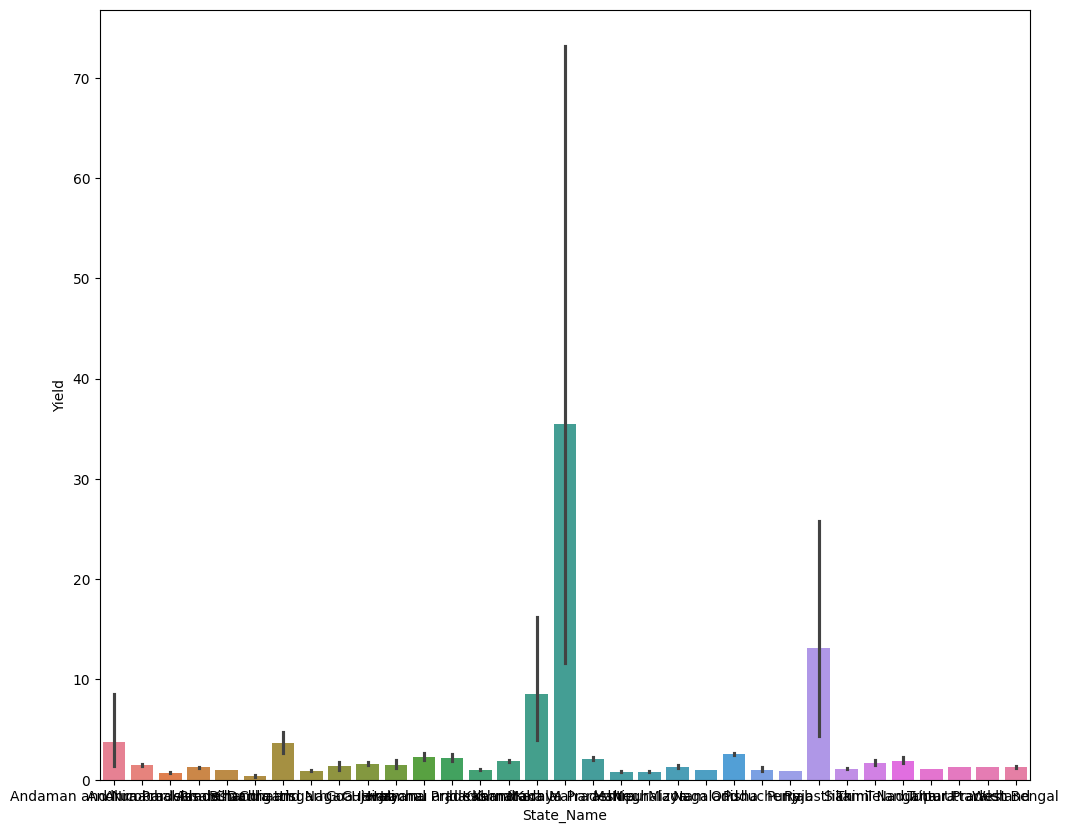

In [42]:
#finding the relation between state name and yield
plt.figure(figsize=(12,10))
sns.barplot(x='State_Name',y='Yield',data=data,hue='State_Name')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
 7   Yield          242361 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 16.6+ MB


In [44]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['State_Name']=le.fit_transform(data['State_Name'])
data['District_Name']=le.fit_transform(data['District_Name'])
data['Season']=le.fit_transform(data['Season'])
data['Crop']=le.fit_transform(data['Crop'])
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,0,427,2000,1,2,1254.0,2000.0,0.627000
1,0,427,2000,1,74,2.0,1.0,2.000000
2,0,427,2000,1,95,102.0,321.0,0.317757
3,0,427,2000,4,7,176.0,641.0,0.274571
4,0,427,2000,4,22,720.0,165.0,4.363636


<Axes: >

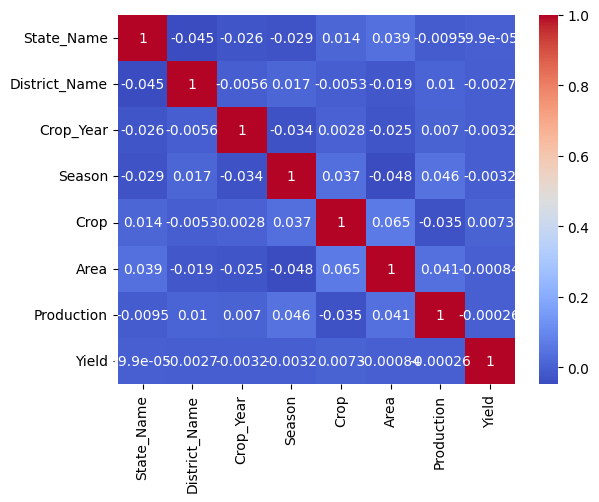

In [45]:
cm=data.corr()
sns.heatmap(cm,annot=True,cmap='coolwarm')

# Model building and evaluation

In [46]:
#assigning values to x and y
x = data.drop(["Production","Yield"], axis=1)
y = data["Production"]


In [47]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

 Fit the Model & Predict , check the Accuracy

In [48]:
#linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [49]:
y_pred=model.predict(x_test)

In [50]:
#calculating the mean squared error, root mean squared error, r2 score
from sklearn.metrics import  mean_squared_error, r2_score
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 215748605120139.78
Root Mean Squared Error: 14688383.33922899
R-squared Score: 0.003366778058107256


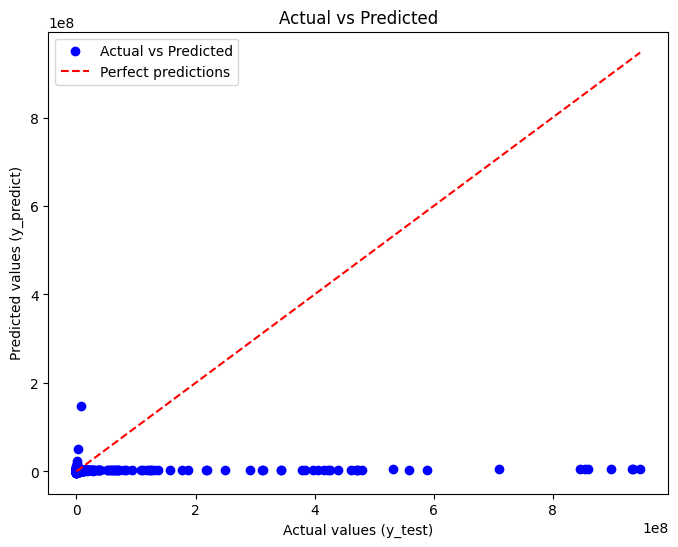

In [51]:
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Scatter plot of y_test vs y_predict
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Plotting the diagonal line to indicate perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect predictions')

# Labels and title
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_predict)')
plt.title('Actual vs Predicted')
plt.legend()

# Show plot
plt.show()


The linear regression algorithm is not suitable for the given dataset

In [52]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred2=model.predict(x_test)

In [53]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred2)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred2)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R2):", r2)

Mean Squared Error (MSE): 8211258623729.245
Root Mean Squared Error (RMSE): 2865529.3793170652
R-squared Score (R2): 0.9620687552820637


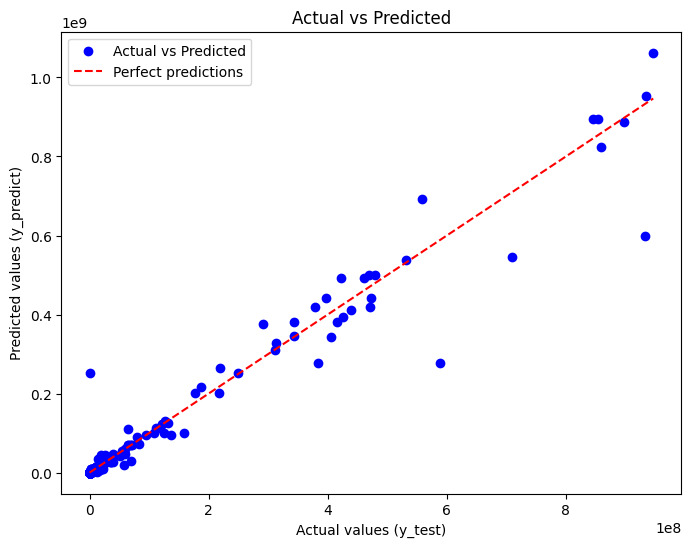

In [54]:
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Scatter plot of y_test vs y_predict
plt.scatter(y_test, y_pred2, color='blue', label='Actual vs Predicted')

# Plotting the diagonal line to indicate perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect predictions')

# Labels and title
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_predict)')
plt.title('Actual vs Predicted')
plt.legend()

# Show plot
plt.show()

In [55]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred3=model.predict(x_test)

In [56]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred3)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred3)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R2):", r2)

Mean Squared Error (MSE): 7685166737968.907
Root Mean Squared Error (RMSE): 2772213.3283657855
R-squared Score (R2): 0.9644989941744582


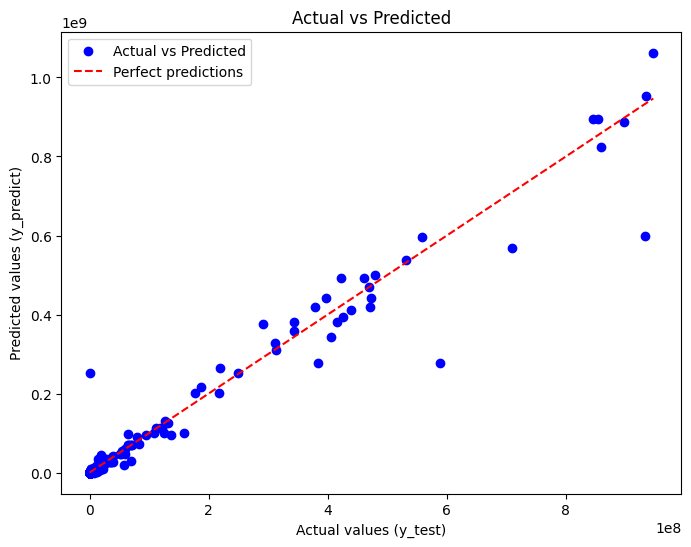

In [57]:
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Scatter plot of y_test vs y_predict
plt.scatter(y_test, y_pred3, color='blue', label='Actual vs Predicted')

# Plotting the diagonal line to indicate perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect predictions')

# Labels and title
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_predict)')
plt.title('Actual vs Predicted')
plt.legend()

# Show plot
plt.show()

In [58]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
y_pred4=model.predict(x_test)

In [60]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred4)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred4)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R2):", r2)

Mean Squared Error (MSE): 7456500353366.547
Root Mean Squared Error (RMSE): 2730659.3257611883
R-squared Score (R2): 0.9655553000333496


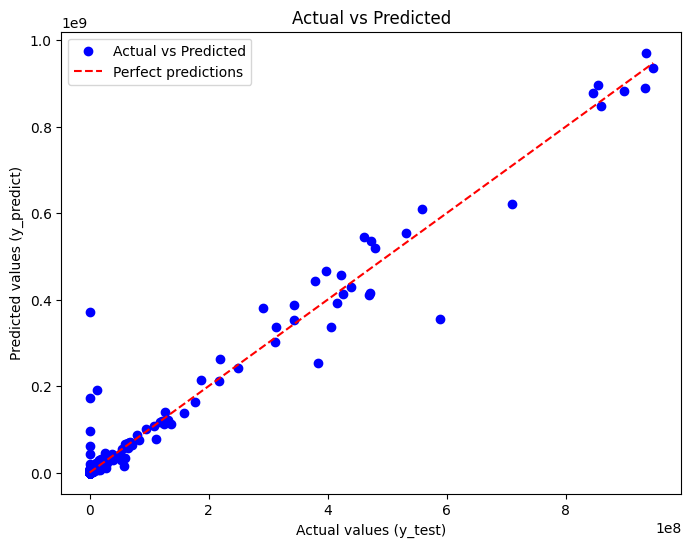

In [61]:
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Scatter plot of y_test vs y_predict
plt.scatter(y_test, y_pred4, color='blue', label='Actual vs Predicted')

# Plotting the diagonal line to indicate perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect predictions')

# Labels and title
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_predict)')
plt.title('Actual vs Predicted')
plt.legend()

# Show plot
plt.show()

# Comparing r2 values

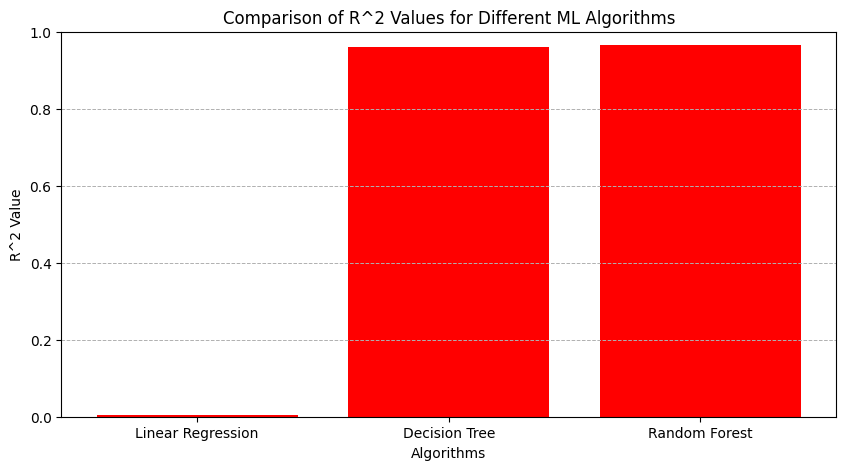

In [63]:
r2_values = {
    'Linear Regression':0.003366778058107256,
    'Decision Tree':0.9612304631975571,
    'Random Forest':0.9647984112207513,
    }

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(r2_values.keys(), r2_values.values(), color='red')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.xlabel('Algorithms')
plt.ylabel('R^2 Value')
plt.title('Comparison of R^2 Values for Different ML Algorithms')
plt.ylim(0, 1)  # Since R^2 values are between 0 and 1
plt.show()

from the figure it is clear that decision tree, random forest algorithms are suitable for the given data set. Among these Random forest showing highest r2 value